# Aprendizagem Automática - Student Sucess Uevora

- Teachers: Teresa Gonçalves, Luis Rato
- Made by: Miguel de Carvalho (43108), João Pereira(42864)

## Add necessary imports for our code

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn import metrics

## Funcion that reads and parse our data

In [2]:
def data_treatment(file):
    data = pd.read_csv(file, header=0)
    if(file=='train.csv'):
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        y_data = data[['Failure']].copy()
        data.drop('Failure',axis=1,inplace=True)
        x_data = data.copy()
        return x_data,y_data
    else:
        save = data['Id'].copy()
        data.drop('Id',axis=1,inplace=True) 
        enconde = {"Program": {"Informatics": 0, "Nursing": 1, "Management": 2, "Biology": 3}}
        data = data.replace(enconde)
        return data,save

x_train,y_train = data_treatment('train.csv')
x_test,id_column = data_treatment('test.csv')

## Testing with different Models 

### GradientBoostingClassifier 

The first model we chose was GradientBoostingClassifier. We started by running it without any parameters set by us and just stick with the default ones. Then we start by doing some tests and representing that with some plots, just to be more clearly the difference between them (supervised learning).

In [3]:
from sklearn.ensemble import GradientBoostingClassifier 

#### Choosing the best Parameters

We will test each parameter and try to get the best of each one

##### Parameter "learning_rate"

learning_rate shrinks the contribution of each tree by learning_rate.

learning_rate: 0.01, train_accuracy: 0.919284940411701 ,test_accuracy: 0.9149529964747357
learning_rate: 0.11, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9479964747356051
learning_rate: 0.21000000000000002, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.9474500587544066
learning_rate: 0.31000000000000005, train_accuracy: 0.980498374864572 ,test_accuracy: 0.945822561692127
learning_rate: 0.41000000000000003, train_accuracy: 0.9864572047670639 ,test_accuracy: 0.9431139835487663
learning_rate: 0.51, train_accuracy: 0.9409534127843987 ,test_accuracy: 0.9398648648648649
learning_rate: 0.6100000000000001, train_accuracy: 0.9902491874322861 ,test_accuracy: 0.9376997649823735
learning_rate: 0.7100000000000001, train_accuracy: 0.9924160346695557 ,test_accuracy: 0.9225176263219741
learning_rate: 0.81, train_accuracy: 0.9609967497291441 ,test_accuracy: 0.9382344300822562
learning_rate: 0.91, train_accuracy: 0.9940411700975081 ,test_accuracy: 0.9382491186839012
learning_rate: 1.01,

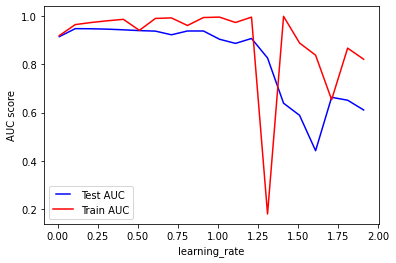

In [4]:
min_learning = 0.01
max_learning = 1
inc_learning = int((max_learning-min_learning)/10)
n_learning = np.arange(min_learning,max_learning+1,0.10)
vali_results = []
train_results = []

for learning in n_learning:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=learning, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"learning_rate: {learning}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_learning, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_learning, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('learning_rate')
plt.show()

##### Parameter "n_estimators"

n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

n_estimators: 1, train_accuracy: 0.7291440953412784 ,test_accuracy: 0.7291421856639249
n_estimators: 20, train_accuracy: 0.9247020585048754 ,test_accuracy: 0.9209077555816687
n_estimators: 39, train_accuracy: 0.942578548212351 ,test_accuracy: 0.9371621621621621
n_estimators: 58, train_accuracy: 0.9507042253521126 ,test_accuracy: 0.9425793184488835
n_estimators: 77, train_accuracy: 0.9582881906825569 ,test_accuracy: 0.9436633372502939
n_estimators: 96, train_accuracy: 0.9582881906825569 ,test_accuracy: 0.945831374853114
n_estimators: 115, train_accuracy: 0.9653304442036836 ,test_accuracy: 0.9474500587544066
n_estimators: 134, train_accuracy: 0.9642470205850487 ,test_accuracy: 0.9485399529964746
n_estimators: 153, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.9452761457109282
n_estimators: 172, train_accuracy: 0.9669555796316359 ,test_accuracy: 0.9447444183313749
n_estimators: 191, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9479905992949472


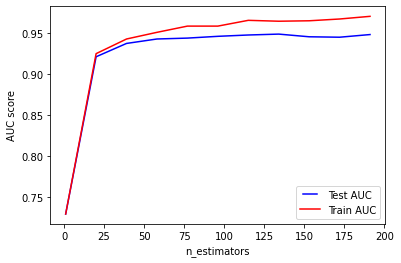

In [5]:
min_estimators = 1
max_estimators = 200
inc_estimators = int((max_estimators-min_estimators)/10)
n_estimators = range(min_estimators,max_estimators+1,inc_estimators)
vali_results = []
train_results = []

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator,learning_rate=0.11, max_depth=3, min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"n_estimators: {estimator}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_estimators, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('n_estimators')
plt.show()

##### Parameter "max_depth"

max_depth indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

max_depth: 1, train_accuracy: 0.9517876489707475 ,test_accuracy: 0.9404054054054054
max_depth: 2, train_accuracy: 0.9604550379198267 ,test_accuracy: 0.9474618096357228
max_depth: 3, train_accuracy: 0.9637053087757314 ,test_accuracy: 0.9463689776733254
max_depth: 4, train_accuracy: 0.9631635969664138 ,test_accuracy: 0.9452878965922444
max_depth: 5, train_accuracy: 0.9658721560130011 ,test_accuracy: 0.9474500587544066
max_depth: 6, train_accuracy: 0.9680390032502708 ,test_accuracy: 0.9469124559341952
max_depth: 7, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9479994124559342
max_depth: 8, train_accuracy: 0.9647887323943662 ,test_accuracy: 0.946909518213866
max_depth: 9, train_accuracy: 0.9674972914409534 ,test_accuracy: 0.9452790834312573
max_depth: 10, train_accuracy: 0.9696641386782232 ,test_accuracy: 0.9474529964747356


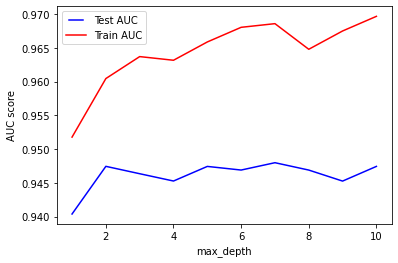

In [6]:
min_depth = 1
max_depth = 10
inc_depth = int((max_depth-min_depth)/10)
n_depth = np.arange(min_depth,max_depth+1,1)
vali_results = []
train_results = []

for depth in n_depth:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=float(depth), min_samples_split=0.7, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_depth: {depth}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_depth, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_depth, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_depth')
plt.show()

##### Parameter "min_samples_split"

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_split: 0.1, train_accuracy: 0.9994582881906826 ,test_accuracy: 0.9469007050528789
min_samples_split: 0.2, train_accuracy: 0.9983748645720477 ,test_accuracy: 0.9447356051703878
min_samples_split: 0.30000000000000004, train_accuracy: 0.9907908992416035 ,test_accuracy: 0.9479964747356051
min_samples_split: 0.4, train_accuracy: 0.985373781148429 ,test_accuracy: 0.9463719153936545
min_samples_split: 0.5, train_accuracy: 0.9756229685807151 ,test_accuracy: 0.9479935370152763
min_samples_split: 0.6, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9485370152761456
min_samples_split: 0.7000000000000001, train_accuracy: 0.9664138678223185 ,test_accuracy: 0.9496239717978849
min_samples_split: 0.8, train_accuracy: 0.9609967497291441 ,test_accuracy: 0.9479994124559342
min_samples_split: 0.9, train_accuracy: 0.9544962080173348 ,test_accuracy: 0.9442038777908344
min_samples_split: 1.0, train_accuracy: 0.9539544962080173 ,test_accuracy: 0.9436545240893066


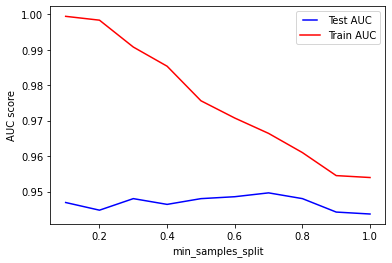

In [7]:
min_samples = 0.1
max_samples = 1.1
n_samples = np.arange(min_samples,max_samples,0.1)
vali_results = []
train_results = []

for samples in n_samples:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=samples, min_samples_leaf=7, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_split: {samples}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_samples, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_samples, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_split')
plt.show()

##### Parameters "min_samples_leaf"

min_samples_leaf is The minimum number of samples required to be at a leaf node. This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.

min_samples_leaf: 1, train_accuracy: 0.9729144095341279 ,test_accuracy: 0.9452732079905992
min_samples_leaf: 2, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9442038777908344
min_samples_leaf: 3, train_accuracy: 0.9729144095341279 ,test_accuracy: 0.9474500587544066
min_samples_leaf: 4, train_accuracy: 0.9734561213434453 ,test_accuracy: 0.9496239717978849
min_samples_leaf: 5, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.945828437132785
min_samples_leaf: 6, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9474471210340776
min_samples_leaf: 7, train_accuracy: 0.9707475622968581 ,test_accuracy: 0.9458284371327851
min_samples_leaf: 8, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9485399529964746
min_samples_leaf: 9, train_accuracy: 0.9702058504875406 ,test_accuracy: 0.9490775558166863


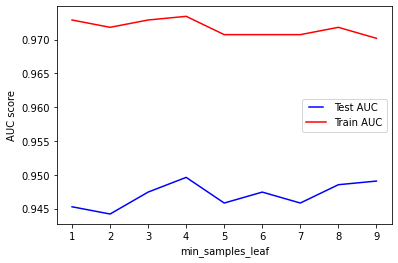

In [8]:
min_leaf = 1
max_leaf = 10
n_leafs = np.arange(min_leaf,max_leaf,1)
vali_results = []
train_results = []

for leaf in n_leafs:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=leaf, max_features=8)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"min_samples_leaf: {leaf}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_leafs, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_leafs, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('min_samples_leaf')
plt.show()

##### Parameters "max_features"

max_features represents the number of features to consider when looking for the best split.

max_features: 1, train_accuracy: 0.9555796316359697 ,test_accuracy: 0.9404024676850764
max_features: 2, train_accuracy: 0.9599133261105092 ,test_accuracy: 0.945831374853114
max_features: 3, train_accuracy: 0.9642470205850487 ,test_accuracy: 0.9480023501762632
max_features: 4, train_accuracy: 0.9674972914409534 ,test_accuracy: 0.9507109283196241
max_features: 5, train_accuracy: 0.9685807150595883 ,test_accuracy: 0.9490804935370152
max_features: 6, train_accuracy: 0.9723726977248104 ,test_accuracy: 0.9501645123384254
max_features: 7, train_accuracy: 0.9691224268689057 ,test_accuracy: 0.945819623971798
max_features: 8, train_accuracy: 0.9729144095341279 ,test_accuracy: 0.9447444183313749
max_features: 9, train_accuracy: 0.971830985915493 ,test_accuracy: 0.9479964747356051


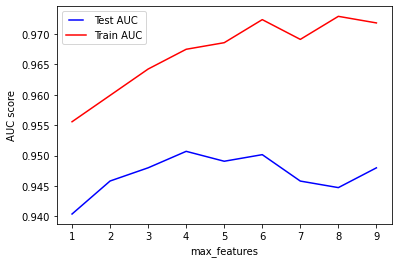

In [9]:
min_features = 1
max_features = 10
n_features = np.arange(min_features,max_features,1)
vali_results = []
train_results = []

for feature in n_features:
    model = GradientBoostingClassifier(n_estimators=138,learning_rate=0.1, max_depth=8, min_samples_split=0.6, min_samples_leaf=7, max_features=feature)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    model.fit(x_train,y_train.values.ravel())
    train_score = model.score(x_train,y_train)
    train_results.append(train_score)
    vali_results.append(scores.mean())
    print(f"max_features: {feature}, train_accuracy: {train_score} ,test_accuracy: {scores.mean()}")


from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_features, vali_results, 'b', label="Test AUC")
line2, = plt.plot(n_features, train_results , 'r', label="Train AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel('max_features')
plt.show()

#### Attempts and Results

On our first attempt we didn't set any parameteres, we just sticked with the default ones.

| attempt/parameters 	| n_estimators 	| learning_rate 	| max_depth 	| min_samples_split 	| min_samples_leaf 	| max_features 	| **Accuracy on Kaggle** 	|
|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|
| 1 	| default 	| default 	| default 	| default 	| default 	| default 	| **0.93617** 	|
| 2 	| 39 	| 0.11 	| 3 	| 0.5 	| 1 	| 8 	| **0.94366** 	|

#### Generate File Result

In [10]:
model = GradientBoostingClassifier(n_estimators=39, learning_rate=0.11, max_depth=3, min_samples_split=0.5, min_samples_leaf=1, max_features=8)

model.fit(x_train, y_train.values.ravel())

result = model.predict(x_test)

result = pd.DataFrame(data=result)
result.columns = ['Failure']
result.insert(loc=0,column ='Id',value=id_column)

result.to_csv(r'result.csv', index = False)

### BaggingClassifier

The second model we used was BagginClassifier with GridSearch to get us the best parameters we could use.

#### Default

In [11]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier()
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9322620446533489


In [12]:
#### GridSearchCV

In [13]:
from sklearn.ensemble import BaggingClassifier

parameters_B = {
    "n_estimators":np.arange(1,500,50),
    "max_samples":np.arange(1,500,50),
    }

clf = GridSearchCV(BaggingClassifier(), parameters_B,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.942035840188014


#### Results

| Attempt | Parameters | **Accuracy on Kaggle** |
|:-------:|:----------:|:----------------------:|
|    1    |   Default  |         91.2%          |
|    2    | GridSearch |          92.957%       |

### KNeighborsClassifier

The third model we used was KNeighborsClassifier with GridSearch to get us the best parameters we could use.

#### Default

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9398501762632199


#### GridSearchCV

In [15]:
from sklearn.neighbors import KNeighborsClassifier

parameters_K = {
    "n_neighbors":np.arange(1,500,50),
    "weights": ["uniform",  "distance"],
    "leaf_size": np.arange(1,1000,50)
}

clf = GridSearchCV(KNeighborsClassifier(), parameters_K,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9246827262044655


#### Results

| Attempt | Parameters | **Accuracy on Kaggle** |
|:-------:|:----------:|:----------------------:|
|    1    |   Default  |             93.0%      |
|    2    | GridSearch |           95.0%        |

### LogisticRegression

The forth model we used was LogisticRegression with GridSearch to get us the best parameters we could use.

In [16]:
from sklearn.linear_model import LogisticRegression

parameters_L = {
    "C":np.arange(1,701,50),
    "penalty": ["l1","l2"],
    "solver": ["liblinear",],
    "tol": [1e-4],
    "max_iter": np.arange(1000,7001,1000),
    "intercept_scaling":np.arange(1,701,50),
    "multi_class":["auto"],
    }

clf = GridSearchCV(LogisticRegression(), parameters_L,scoring='accuracy',refit=True,cv=2, n_jobs=-1)
clf.fit(x_train, y_train.values.ravel())

scores = cross_val_score(clf, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
print(scores.mean())

0.9436603995299647


#### Results

We got an accuracy of 95.8% on **Kaggle**.

### Conclusion

The **model** that gave us the best accuracy was `LogisticRegression` with **95.8%**

Making this work showed us how the models are important in machine-learning to predict the results, in this example we are trying to predict if a student is going to drop out or not. For the solution to be trustfull:

- We need to understand the data first: merge and spliting the usefull data.

- Choose the best model or strategy based on the data, because some models work better with different types of data.

- Adjusting the model to get the best performance: validating the model, letting us get the best parameters.

- Check if the final model can solve the problem.